# Importing Data set and Package 

In [180]:
import pandas as pd
import numpy as np

#ML
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,roc_auc_score,f1_score,plot_confusion_matrix,plot_roc_curve,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#graph
import seaborn as sns
from matplotlib import pyplot as plt 

#notebook setting
import warnings
warnings.filterwarnings('ignore')

In [181]:
credit=pd.read_csv('credit_record.csv')
credit

ID  MONTHS_BALANCE STATUS
0        5001711               0      X
1        5001711              -1      0
2        5001711              -2      0
3        5001711              -3      0
4        5001712               0      C
...          ...             ...    ...
1048570  5150487             -25      C
1048571  5150487             -26      C
1048572  5150487             -27      C
1048573  5150487             -28      C
1048574  5150487             -29      C

[1048575 rows x 3 columns]

In [182]:
application=pd.read_csv('application_record.csv')
application

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008805           M            Y               Y             0   
2       5008806           M            Y               Y             0   
3       5008808           F            N               Y             0   
4       5008809           F            N               Y             0   
...         ...         ...          ...             ...           ...   
438552  6840104           M            N               Y             0   
438553  6840222           F            N               N             0   
438554  6841878           F            N               N             0   
438555  6842765           F            N               Y             0   
438556  6842885           F            N               Y             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               427500.0               Working               Higher education   
1               427500.0               Working               Higher education   
2               112500.0               Working  Secondary / secondary special   
3               270000.0  Commercial associate  Secondary / secondary special   
4               270000.0  Commercial associate  Secondary / secondary special   
...                  ...                   ...                            ...   
438552          135000.0             Pensioner  Secondary / secondary special   
438553          103500.0               Working  Secondary / secondary special   
438554           54000.0  Commercial associate               Higher education   
438555           72000.0             Pensioner  Secondary / secondary special   
438556          121500.0               Working  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             Civil marriage   Rented apartment      -12005          -4542   
1             Civil marriage   Rented apartment      -12005          -4542   
2                    Married  House / apartment      -21474          -1134   
3       Single / not married  House / apartment      -19110          -3051   
4       Single / not married  House / apartment      -19110          -3051   
...                      ...                ...         ...            ...   
438552             Separated  House / apartment      -22717         365243   
438553  Single / not married  House / apartment      -15939          -3007   
438554  Single / not married       With parents       -8169           -372   
438555               Married  House / apartment      -21673         365243   
438556               Married  House / apartment      -18858          -1201   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0                1                1           0           0             NaN   
1                1                1           0           0             NaN   
2                1                0           0           0  Security staff   
3                1                0           1           1     Sales staff   
4                1                0           1           1     Sales staff   
...            ...              ...         ...         ...             ...   
438552           1                0           0           0             NaN   
438553           1                0           0           0        Laborers   
438554           1                1           0           0     Sales staff   
438555           1                0           0           0             NaN   
438556           1                0           1           0     Sales staff   

        CNT_FAM_MEMBERS  
0                   2.0  
1                   2.0  
2                   2.0  
3                   1.0  
4                   1.0  
...                 ...  
438552              1.0  
438553              1.0  
438554              1.0  
43855

# EDA & Vintage Analysis

There are several method to analyzing credit card portofolio data to decide bad customer or not such as:
1.Vintage Analysis
2.Rool rate analysis
3.etc

“The method could become a minimum requirement to support the
allowance for loan and lease losses (ALLL) estimate under the Financial
Accounting Standards Board’s (FASB) current expected credit loss
(CECL) model. Other analyses may be more appropriate than vintage
analysis as a basis for the ALLL estimate, however, because vintage
analysis allows for review of loan activity from the beginning of the life
of the loan (origination) to the end (pay off or charge off), it will likely
be the minimum requirement”<br>
-Michael L. Gullette, VP Accounting and Financial Management at the American Bankers Association

In [183]:
grouped = credit.groupby('ID')
### convert credit data to wide format which every ID is a row
pivot_tb = credit.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS')
pivot_tb

MONTHS_BALANCE  -60  -59  -58  -57  -56  -55  -54  -53  -52  -51  ...  -9   \
ID                                                                ...        
5001711         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
5001712         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    0   
5001713         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    X   
5001714         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    X   
5001715         NaN    X    X    X    X    X    X    X    X    X  ...    X   
...             ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5150482         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
5150483         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    X   
5150484         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    0   
5150485         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
5150487         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...    C   

MONTHS_BALANCE  -8   -7   -6   -5   -4   -3   -2   -1    0   
ID                                                           
5001711         NaN  NaN  NaN  NaN  NaN    0    0    0    X  
5001712           C    C    C    C    C    C    C    C    C  
5001713           X    X    X    X    X    X    X    X    X  
5001714           X    X    X    X    X    X    X    X    X  
5001715           X    X    X    X    X    X    X    X    X  
...             ...  ...  ...  ...  ...  ...  ...  ...  ...  
5150482         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5150483           X    X    X    X    X    X    X    X    X  
5150484           0    0    0    0    0    0    0    0    C  
5150485         NaN  NaN  NaN  NaN  NaN  NaN  NaN    0    0  
5150487           C    C    C    C    C    C    C    C    C  

[45985 rows x 61 columns]

In [184]:

pivot_tb['open_month'] = grouped['MONTHS_BALANCE'].min() # smallest value of MONTHS_BALANCE, is the month when loan was granted
pivot_tb['end_month'] = grouped['MONTHS_BALANCE'].max() # biggest value of MONTHS_BALANCE, might be observe over or canceling account
pivot_tb['ID'] = pivot_tb.index
pivot_tb = pivot_tb[['ID', 'open_month', 'end_month']]
pivot_tb['window'] = pivot_tb['end_month'] - pivot_tb['open_month'] # calculate observe window
pivot_tb.reset_index(drop = True, inplace = True)
pivot_tb


MONTHS_BALANCE       ID  open_month  end_month  window
0               5001711          -3          0       3
1               5001712         -18          0      18
2               5001713         -21          0      21
3               5001714         -14          0      14
4               5001715         -59          0      59
...                 ...         ...        ...     ...
45980           5150482         -28        -11      17
45981           5150483         -17          0      17
45982           5150484         -12          0      12
45983           5150485          -1          0       1
45984           5150487         -29          0      29

[45985 rows x 4 columns]

In [185]:
credit = pd.merge(credit, pivot_tb, on = 'ID', how = 'left') # join calculated information
credit

ID  MONTHS_BALANCE STATUS  open_month  end_month  window
0        5001711               0      X          -3          0       3
1        5001711              -1      0          -3          0       3
2        5001711              -2      0          -3          0       3
3        5001711              -3      0          -3          0       3
4        5001712               0      C         -18          0      18
...          ...             ...    ...         ...        ...     ...
1048570  5150487             -25      C         -29          0      29
1048571  5150487             -26      C         -29          0      29
1048572  5150487             -27      C         -29          0      29
1048573  5150487             -28      C         -29          0      29
1048574  5150487             -29      C         -29          0      29

[1048575 rows x 6 columns]

In [186]:
credit0 = credit.copy()
credit = credit[credit['window'] > 20] # delete users whose observe window less than 20
credit['status'] = np.where((credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 1, 0) # analyze > 60 days past due 
credit['status'] = credit['status'].astype(np.int8) # 1: overdue 0: not
credit['month_on_book'] = credit['MONTHS_BALANCE'] - credit['open_month'] # calculate month on book: how many months after opening account
credit.sort_values(by = ['ID','month_on_book'], inplace = True)
credit

ID  MONTHS_BALANCE STATUS  open_month  end_month  window  \
44       5001713             -21      X         -21          0      21   
43       5001713             -20      X         -21          0      21   
42       5001713             -19      X         -21          0      21   
41       5001713             -18      X         -21          0      21   
40       5001713             -17      X         -21          0      21   
...          ...             ...    ...         ...        ...     ...   
1048549  5150487              -4      C         -29          0      29   
1048548  5150487              -3      C         -29          0      29   
1048547  5150487              -2      C         -29          0      29   
1048546  5150487              -1      C         -29          0      29   
1048545  5150487               0      C         -29          0      29   

         status  month_on_book  
44            0              0  
43            0              1  
42            0              2  
41            0              3  
40            0              4  
...         ...            ...  
1048549       0             25  
1048548       0             26  
1048547       0             27  
1048546       0             28  
1048545       0             29  

[775282 rows x 8 columns]

In [187]:
##### denominator
denominator = pivot_tb.groupby(['open_month']).agg({'ID': ['count']}) # count how many users in every month the account was opened
denominator.reset_index(inplace = True)
denominator.columns = ['open_month','sta_sum']
denominator

open_month  sta_sum
0          -60      415
1          -59      406
2          -58      440
3          -57      400
4          -56      470
..         ...      ...
56          -4      874
57          -3      919
58          -2      771
59          -1      686
60           0      370

[61 rows x 2 columns]

In [188]:
##### ventage table
vintage = credit.groupby(['open_month','month_on_book']).agg({'ID': ['count']}) 
vintage.reset_index(inplace = True)
vintage.columns = ['open_month','month_on_book','sta_sum'] 
vintage['due_count'] = np.nan
vintage = vintage[['open_month','month_on_book','due_count']] # delete aggerate column
vintage = pd.merge(vintage, denominator, on = ['open_month'], how = 'left') # join sta_sum colun to vintage table
vintage

open_month  month_on_book  due_count  sta_sum
0            -60              0        NaN      415
1            -60              1        NaN      415
2            -60              2        NaN      415
3            -60              3        NaN      415
4            -60              4        NaN      415
...          ...            ...        ...      ...
1655         -21             17        NaN      858
1656         -21             18        NaN      858
1657         -21             19        NaN      858
1658         -21             20        NaN      858
1659         -21             21        NaN      858

[1660 rows x 4 columns]

In [189]:
for j in range(-60,1): # outer loop: month in which account was opened
    ls = []
    for i in range(0,61): # inner loop time after the credit card was granted
        due = list(credit[(credit['status'] == 1) & (credit['month_on_book'] == i) & (credit['open_month'] == j)]['ID']) # get ID which satisfy the condition
        ls.extend(due) # As time goes, add bad customers
        vintage.loc[(vintage['month_on_book'] == i) & (vintage['open_month'] == j), 'due_count'] = len(set(ls)) # calculate non-duplicate ID numbers using set()
vintage

open_month  month_on_book  due_count  sta_sum
0            -60              0        0.0      415
1            -60              1        0.0      415
2            -60              2        0.0      415
3            -60              3        0.0      415
4            -60              4        0.0      415
...          ...            ...        ...      ...
1655         -21             17       15.0      858
1656         -21             18       15.0      858
1657         -21             19       15.0      858
1658         -21             20       15.0      858
1659         -21             21       15.0      858

[1660 rows x 4 columns]

In [190]:

vintage['sta_rate']  = vintage['due_count'] / vintage['sta_sum'] # calculate cumulative % of bad customers
vintage

open_month  month_on_book  due_count  sta_sum  sta_rate
0            -60              0        0.0      415  0.000000
1            -60              1        0.0      415  0.000000
2            -60              2        0.0      415  0.000000
3            -60              3        0.0      415  0.000000
4            -60              4        0.0      415  0.000000
...          ...            ...        ...      ...       ...
1655         -21             17       15.0      858  0.017483
1656         -21             18       15.0      858  0.017483
1657         -21             19       15.0      858  0.017483
1658         -21             20       15.0      858  0.017483
1659         -21             21       15.0      858  0.017483

[1660 rows x 5 columns]

In [191]:

### Vintage wide table
vintage_wide = vintage.pivot(index = 'open_month',
                             columns = 'month_on_book',
                             values = 'sta_rate')
vintage_wide.style

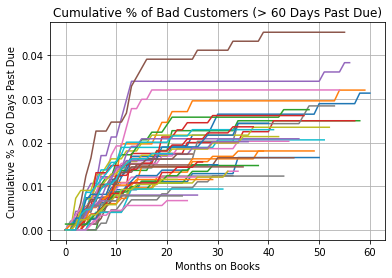

In [192]:
# plot vintage line chart
plt.rcParams['figure.facecolor'] = 'white'
vintage0 = vintage_wide.replace(0,np.nan)
#lst = [i for i in range(0,61)]
vintage_wide[range(61)].T.plot(legend = False, grid = True, title = 'Cumulative % of Bad Customers (> 60 Days Past Due)')
#plt.axvline(30)
#plt.axvline(25)
#plt.axvline(20)
plt.xlabel('Months on Books')
plt.ylabel('Cumulative % > 60 Days Past Due')
plt.show()

## Cumulative % of Bad Customers (> 90 Days Past Due)

In [193]:
credit = credit[credit['window'] > 20] # delete users whose observe window less than 20
credit['status'] = np.where((credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 1, 0) # analyze > 90 days past due 
credit['status'] = credit['status'].astype(np.int8) # 1: overdue 0: not
credit['month_on_book'] = credit['MONTHS_BALANCE'] - credit['open_month'] # calculate month on book: how many months after opening account
credit.sort_values(by = ['ID','month_on_book'], inplace = True)
credit

ID  MONTHS_BALANCE STATUS  open_month  end_month  window  \
44       5001713             -21      X         -21          0      21   
43       5001713             -20      X         -21          0      21   
42       5001713             -19      X         -21          0      21   
41       5001713             -18      X         -21          0      21   
40       5001713             -17      X         -21          0      21   
...          ...             ...    ...         ...        ...     ...   
1048549  5150487              -4      C         -29          0      29   
1048548  5150487              -3      C         -29          0      29   
1048547  5150487              -2      C         -29          0      29   
1048546  5150487              -1      C         -29          0      29   
1048545  5150487               0      C         -29          0      29   

         status  month_on_book  
44            0              0  
43            0              1  
42            0              2  
41            0              3  
40            0              4  
...         ...            ...  
1048549       0             25  
1048548       0             26  
1048547       0             27  
1048546       0             28  
1048545       0             29  

[775282 rows x 8 columns]

In [194]:
##### ventage table
vintage = credit.groupby(['open_month','month_on_book']).agg({'ID': ['count']}) 
vintage.reset_index(inplace = True)
vintage.columns = ['open_month','month_on_book','sta_sum'] 
vintage['due_count'] = np.nan
vintage = vintage[['open_month','month_on_book','due_count']] # delete aggerate column
vintage = pd.merge(vintage, denominator, on = ['open_month'], how = 'left') # join sta_sum colun to vintage table
vintage

open_month  month_on_book  due_count  sta_sum
0            -60              0        NaN      415
1            -60              1        NaN      415
2            -60              2        NaN      415
3            -60              3        NaN      415
4            -60              4        NaN      415
...          ...            ...        ...      ...
1655         -21             17        NaN      858
1656         -21             18        NaN      858
1657         -21             19        NaN      858
1658         -21             20        NaN      858
1659         -21             21        NaN      858

[1660 rows x 4 columns]

In [195]:
for j in range(-60,1): # outer loop: month in which account was opened
    ls = []
    for i in range(0,61): # inner loop time after the credit card was granted
        due = list(credit[(credit['status'] == 1) & (credit['month_on_book'] == i) & (credit['open_month'] == j)]['ID']) # get ID which satisfy the condition
        ls.extend(due) # As time goes, add bad customers
        vintage.loc[(vintage['month_on_book'] == i) & (vintage['open_month'] == j), 'due_count'] = len(set(ls)) # calculate non-duplicate ID numbers using set()
vintage

open_month  month_on_book  due_count  sta_sum
0            -60              0        0.0      415
1            -60              1        0.0      415
2            -60              2        0.0      415
3            -60              3        0.0      415
4            -60              4        0.0      415
...          ...            ...        ...      ...
1655         -21             17        5.0      858
1656         -21             18        6.0      858
1657         -21             19        7.0      858
1658         -21             20        7.0      858
1659         -21             21        7.0      858

[1660 rows x 4 columns]

In [196]:

vintage['sta_rate']  = vintage['due_count'] / vintage['sta_sum'] # calculate cumulative % of bad customers
vintage

open_month  month_on_book  due_count  sta_sum  sta_rate
0            -60              0        0.0      415  0.000000
1            -60              1        0.0      415  0.000000
2            -60              2        0.0      415  0.000000
3            -60              3        0.0      415  0.000000
4            -60              4        0.0      415  0.000000
...          ...            ...        ...      ...       ...
1655         -21             17        5.0      858  0.005828
1656         -21             18        6.0      858  0.006993
1657         -21             19        7.0      858  0.008159
1658         -21             20        7.0      858  0.008159
1659         -21             21        7.0      858  0.008159

[1660 rows x 5 columns]

In [197]:

### Vintage wide table
vintage_wide = vintage.pivot(index = 'open_month',
                             columns = 'month_on_book',
                             values = 'sta_rate')
vintage_wide

month_on_book       0         1         2         3         4         5   \
open_month                                                                 
-60            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-59            0.00000  0.000000  0.000000  0.000000  0.004926  0.004926   
-58            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-57            0.00000  0.000000  0.000000  0.000000  0.002500  0.002500   
-56            0.00000  0.000000  0.000000  0.002128  0.002128  0.002128   
-55            0.00000  0.000000  0.000000  0.000000  0.002058  0.006173   
-54            0.00000  0.000000  0.000000  0.000000  0.002137  0.002137   
-53            0.00000  0.000000  0.002028  0.002028  0.002028  0.002028   
-52            0.00000  0.000000  0.000000  0.001808  0.001808  0.001808   
-51            0.00000  0.000000  0.000000  0.000000  0.001718  0.001718   
-50            0.00000  0.000000  0.000000  0.001842  0.001842  0.001842   
-49            0.00000  0.000000  0.000000  0.000000  0.000000  0.001808   
-48            0.00000  0.000000  0.000000  0.000000  0.001721  0.003442   
-47            0.00000  0.000000  0.000000  0.000000  0.001637  0.001637   
-46            0.00000  0.000000  0.000000  0.001739  0.001739  0.003478   
-45            0.00000  0.000000  0.000000  0.000000  0.000000  0.001653   
-44            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-43            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-42            0.00000  0.000000  0.000000  0.000000  0.000000  0.001425   
-41            0.00000  0.000000  0.000000  0.000000  0.000000  0.004304   
-40            0.00000  0.000000  0.000000  0.001357  0.001357  0.001357   
-39            0.00000  0.001203  0.001203  0.001203  0.001203  0.001203   
-38            0.00134  0.001340  0.001340  0.001340  0.001340  0.001340   
-37            0.00000  0.000000  0.000000  0.000000  0.000000  0.001389   
-36            0.00000  0.000000  0.000000  0.000000  0.001443  0.001443   
-35            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-34            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-33            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-32            0.00000  0.000000  0.001344  0.001344  0.002688  0.002688   
-31            0.00000  0.000000  0.000000  0.000000  0.000000  0.001337   
-30            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-29            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-28            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-27            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-26            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-25            0.00000  0.000000  0.000000  0.001159  0.001159  0.002317   
-24            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-23            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-22            0.00000  0.000000  0.000000  0.001156  0.001156  0.001156   
-21            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   

month_on_book        6         7         8         9   ...        51  \
open_month                                             ...             
-60            0.002410  0.002410  0.002410  0.002410  ...  0.016867   
-59            0.004926  0.007389  0.007389  0.007389  ...  0.019704   
-58            0.000000  0.000000  0.000000  0.002273  ...  0.013636   
-57            0.002500  0.002500  0.005000  0.005000  ...  0.017500   
-56            0.006383  0.006383  0.010638  0.014894  ...  0.021277   
-55            0.006173  0.012346  0.012346  0.012346  ...  0.028807   
-54            0.002137  0.002137  0.006410  0.006410  ...  0.017094   
-53            0.002028  0.002028  0.002028  0.002028  ...  0.010142   
-52            0.001808  0.003617  0.003617  0.005425  ...  0.010850   
-51            

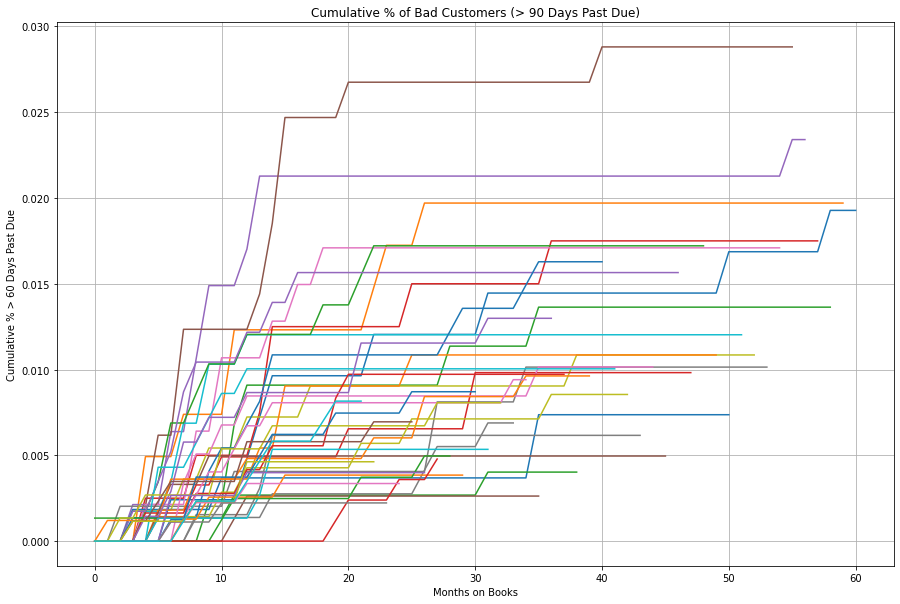

In [198]:
# plot vintage line chart
plt.rcParams['figure.facecolor'] = 'white'
vintage0 = vintage_wide.replace(0,np.nan)
#lst = [i for i in range(0,61)]
vintage_wide[range(61)].T.plot(legend = False, grid = True, title = 'Cumulative % of Bad Customers (> 90 Days Past Due)',figsize=(15,10))
#plt.axvline(30)
#plt.axvline(25)
#plt.axvline(20)
plt.xlabel('Months on Books')
plt.ylabel('Cumulative % > 60 Days Past Due')
plt.show()

## Cumulative % of Bad Customers (> 120 Days Past Due)

In [199]:
credit = credit[credit['window'] > 20] # delete users whose observe window less than 20
credit['status'] = np.where((credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 1, 0) # analyze > 120 days past due 
credit['status'] = credit['status'].astype(np.int8) # 1: overdue 0: not
credit['month_on_book'] = credit['MONTHS_BALANCE'] - credit['open_month'] # calculate month on book: how many months after opening account
credit.sort_values(by = ['ID','month_on_book'], inplace = True)
credit

ID  MONTHS_BALANCE STATUS  open_month  end_month  window  \
44       5001713             -21      X         -21          0      21   
43       5001713             -20      X         -21          0      21   
42       5001713             -19      X         -21          0      21   
41       5001713             -18      X         -21          0      21   
40       5001713             -17      X         -21          0      21   
...          ...             ...    ...         ...        ...     ...   
1048549  5150487              -4      C         -29          0      29   
1048548  5150487              -3      C         -29          0      29   
1048547  5150487              -2      C         -29          0      29   
1048546  5150487              -1      C         -29          0      29   
1048545  5150487               0      C         -29          0      29   

         status  month_on_book  
44            0              0  
43            0              1  
42            0              2  
41            0              3  
40            0              4  
...         ...            ...  
1048549       0             25  
1048548       0             26  
1048547       0             27  
1048546       0             28  
1048545       0             29  

[775282 rows x 8 columns]

In [200]:
##### ventage table
vintage = credit.groupby(['open_month','month_on_book']).agg({'ID': ['count']}) 
vintage.reset_index(inplace = True)
vintage.columns = ['open_month','month_on_book','sta_sum'] 
vintage['due_count'] = np.nan
vintage = vintage[['open_month','month_on_book','due_count']] # delete aggerate column
vintage = pd.merge(vintage, denominator, on = ['open_month'], how = 'left') # join sta_sum colun to vintage table
vintage

open_month  month_on_book  due_count  sta_sum
0            -60              0        NaN      415
1            -60              1        NaN      415
2            -60              2        NaN      415
3            -60              3        NaN      415
4            -60              4        NaN      415
...          ...            ...        ...      ...
1655         -21             17        NaN      858
1656         -21             18        NaN      858
1657         -21             19        NaN      858
1658         -21             20        NaN      858
1659         -21             21        NaN      858

[1660 rows x 4 columns]

In [201]:
for j in range(-60,1): # outer loop: month in which account was opened
    ls = []
    for i in range(0,61): # inner loop time after the credit card was granted
        due = list(credit[(credit['status'] == 1) & (credit['month_on_book'] == i) & (credit['open_month'] == j)]['ID']) # get ID which satisfy the condition
        ls.extend(due) # As time goes, add bad customers
        vintage.loc[(vintage['month_on_book'] == i) & (vintage['open_month'] == j), 'due_count'] = len(set(ls)) # calculate non-duplicate ID numbers using set()
vintage

open_month  month_on_book  due_count  sta_sum
0            -60              0        0.0      415
1            -60              1        0.0      415
2            -60              2        0.0      415
3            -60              3        0.0      415
4            -60              4        0.0      415
...          ...            ...        ...      ...
1655         -21             17        4.0      858
1656         -21             18        4.0      858
1657         -21             19        4.0      858
1658         -21             20        5.0      858
1659         -21             21        5.0      858

[1660 rows x 4 columns]

In [202]:

vintage['sta_rate']  = vintage['due_count'] / vintage['sta_sum'] # calculate cumulative % of bad customers
vintage

open_month  month_on_book  due_count  sta_sum  sta_rate
0            -60              0        0.0      415  0.000000
1            -60              1        0.0      415  0.000000
2            -60              2        0.0      415  0.000000
3            -60              3        0.0      415  0.000000
4            -60              4        0.0      415  0.000000
...          ...            ...        ...      ...       ...
1655         -21             17        4.0      858  0.004662
1656         -21             18        4.0      858  0.004662
1657         -21             19        4.0      858  0.004662
1658         -21             20        5.0      858  0.005828
1659         -21             21        5.0      858  0.005828

[1660 rows x 5 columns]

In [203]:

### Vintage wide table
vintage_wide = vintage.pivot(index = 'open_month',
                             columns = 'month_on_book',
                             values = 'sta_rate')
vintage_wide.style

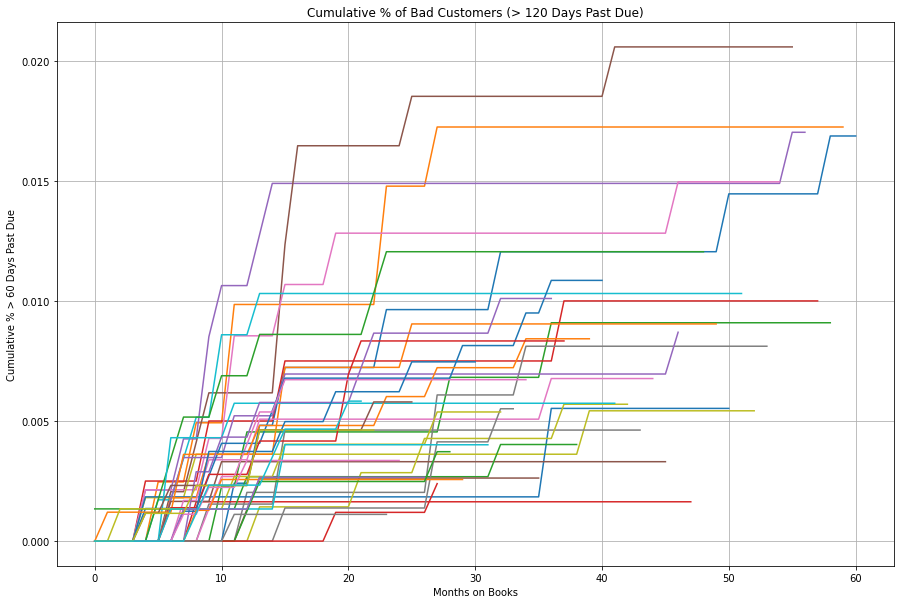

In [204]:
# plot vintage line chart
plt.rcParams['figure.facecolor'] = 'white'
vintage0 = vintage_wide.replace(0,np.nan)
#lst = [i for i in range(0,61)]
vintage_wide[range(61)].T.plot(legend = False, grid = True, title = 'Cumulative % of Bad Customers (> 120 Days Past Due)',figsize=(15,10))
#plt.axvline(30)
#plt.axvline(25)
#plt.axvline(20)
plt.xlabel('Months on Books')
plt.ylabel('Cumulative % > 60 Days Past Due')
plt.show()

## Cumulative % of Bad Customers (> 150 Days Past Due)

In [205]:
credit = credit[credit['window'] > 20] # delete users whose observe window less than 20
credit['status'] = np.where((credit['STATUS'] == '5'), 1, 0) # analyze > 150 days past due 
credit['status'] = credit['status'].astype(np.int8) # 1: overdue 0: not
credit['month_on_book'] = credit['MONTHS_BALANCE'] - credit['open_month'] # calculate month on book: how many months after opening account
credit.sort_values(by = ['ID','month_on_book'], inplace = True)
credit

ID  MONTHS_BALANCE STATUS  open_month  end_month  window  \
44       5001713             -21      X         -21          0      21   
43       5001713             -20      X         -21          0      21   
42       5001713             -19      X         -21          0      21   
41       5001713             -18      X         -21          0      21   
40       5001713             -17      X         -21          0      21   
...          ...             ...    ...         ...        ...     ...   
1048549  5150487              -4      C         -29          0      29   
1048548  5150487              -3      C         -29          0      29   
1048547  5150487              -2      C         -29          0      29   
1048546  5150487              -1      C         -29          0      29   
1048545  5150487               0      C         -29          0      29   

         status  month_on_book  
44            0              0  
43            0              1  
42            0              2  
41            0              3  
40            0              4  
...         ...            ...  
1048549       0             25  
1048548       0             26  
1048547       0             27  
1048546       0             28  
1048545       0             29  

[775282 rows x 8 columns]

In [206]:
##### ventage table
vintage = credit.groupby(['open_month','month_on_book']).agg({'ID': ['count']}) 
vintage.reset_index(inplace = True)
vintage.columns = ['open_month','month_on_book','sta_sum'] 
vintage['due_count'] = np.nan
vintage = vintage[['open_month','month_on_book','due_count']] # delete aggerate column
vintage = pd.merge(vintage, denominator, on = ['open_month'], how = 'left') # join sta_sum colun to vintage table
vintage

open_month  month_on_book  due_count  sta_sum
0            -60              0        NaN      415
1            -60              1        NaN      415
2            -60              2        NaN      415
3            -60              3        NaN      415
4            -60              4        NaN      415
...          ...            ...        ...      ...
1655         -21             17        NaN      858
1656         -21             18        NaN      858
1657         -21             19        NaN      858
1658         -21             20        NaN      858
1659         -21             21        NaN      858

[1660 rows x 4 columns]

In [207]:
for j in range(-60,1): # outer loop: month in which account was opened
    ls = []
    for i in range(0,61): # inner loop time after the credit card was granted
        due = list(credit[(credit['status'] == 1) & (credit['month_on_book'] == i) & (credit['open_month'] == j)]['ID']) # get ID which satisfy the condition
        ls.extend(due) # As time goes, add bad customers
        vintage.loc[(vintage['month_on_book'] == i) & (vintage['open_month'] == j), 'due_count'] = len(set(ls)) # calculate non-duplicate ID numbers using set()
vintage

open_month  month_on_book  due_count  sta_sum
0            -60              0        0.0      415
1            -60              1        0.0      415
2            -60              2        0.0      415
3            -60              3        0.0      415
4            -60              4        0.0      415
...          ...            ...        ...      ...
1655         -21             17        3.0      858
1656         -21             18        3.0      858
1657         -21             19        3.0      858
1658         -21             20        3.0      858
1659         -21             21        3.0      858

[1660 rows x 4 columns]

In [208]:

vintage['sta_rate']  = vintage['due_count'] / vintage['sta_sum'] # calculate cumulative % of bad customers
vintage

open_month  month_on_book  due_count  sta_sum  sta_rate
0            -60              0        0.0      415  0.000000
1            -60              1        0.0      415  0.000000
2            -60              2        0.0      415  0.000000
3            -60              3        0.0      415  0.000000
4            -60              4        0.0      415  0.000000
...          ...            ...        ...      ...       ...
1655         -21             17        3.0      858  0.003497
1656         -21             18        3.0      858  0.003497
1657         -21             19        3.0      858  0.003497
1658         -21             20        3.0      858  0.003497
1659         -21             21        3.0      858  0.003497

[1660 rows x 5 columns]

In [209]:

### Vintage wide table
vintage_wide = vintage.pivot(index = 'open_month',
                             columns = 'month_on_book',
                             values = 'sta_rate')
vintage_wide

month_on_book       0         1         2         3         4         5   \
open_month                                                                 
-60            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-59            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-58            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-57            0.00000  0.000000  0.000000  0.000000  0.002500  0.002500   
-56            0.00000  0.000000  0.000000  0.000000  0.000000  0.002128   
-55            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-54            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-53            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-52            0.00000  0.000000  0.000000  0.000000  0.000000  0.001808   
-51            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-50            0.00000  0.000000  0.000000  0.000000  0.000000  0.001842   
-49            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-48            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-47            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-46            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-45            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-44            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-43            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-42            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-41            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-40            0.00000  0.000000  0.000000  0.000000  0.000000  0.001357   
-39            0.00000  0.001203  0.001203  0.001203  0.001203  0.001203   
-38            0.00134  0.001340  0.001340  0.001340  0.001340  0.001340   
-37            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-36            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-35            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-34            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-33            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-32            0.00000  0.000000  0.001344  0.001344  0.001344  0.001344   
-31            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-30            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-29            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-28            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-27            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-26            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-25            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-24            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-23            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
-22            0.00000  0.000000  0.000000  0.000000  0.000000  0.001156   
-21            0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   

month_on_book        6         7         8         9   ...        51  \
open_month                                             ...             
-60            0.000000  0.000000  0.000000  0.000000  ...  0.009639   
-59            0.002463  0.002463  0.002463  0.004926  ...  0.012315   
-58            0.000000  0.000000  0.000000  0.000000  ...  0.006818   
-57            0.002500  0.002500  0.002500  0.005000  ...  0.010000   
-56            0.002128  0.002128  0.004255  0.004255  ...  0.012766   
-55            0.000000  0.002058  0.002058  0.004115  ...  0.018519   
-54            0.000000  0.002137  0.002137  0.002137  ...  0.010684   
-53            0.000000  0.000000  0.000000  0.000000  ...  0.004057   
-52            0.001808  0.001808  0.001808  0.003617  ...  0.005425   
-51            

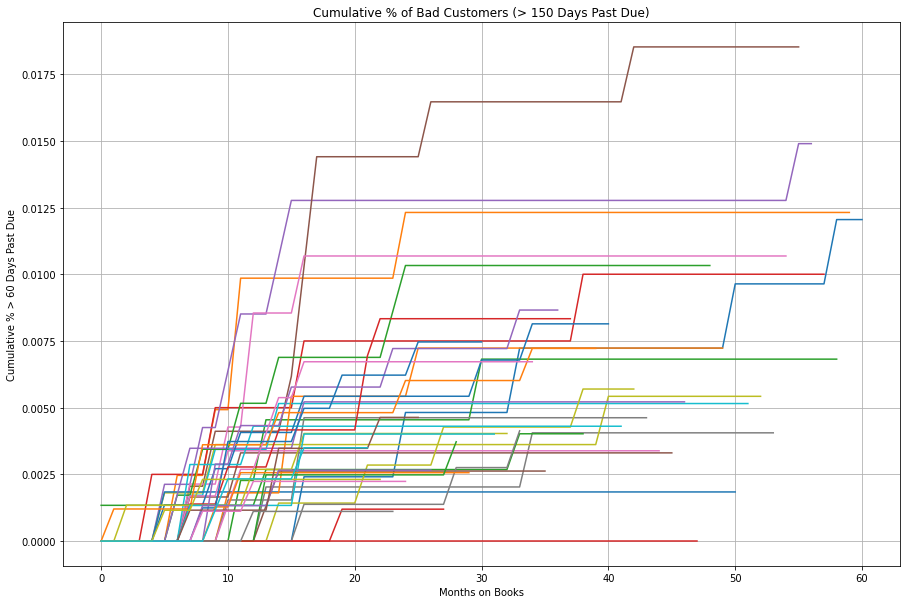

In [210]:
# plot vintage line chart
plt.rcParams['figure.facecolor'] = 'white'
vintage0 = vintage_wide.replace(0,np.nan)
#lst = [i for i in range(0,61)]
vintage_wide[range(61)].T.plot(legend = False, grid = True, title = 'Cumulative % of Bad Customers (> 150 Days Past Due)',figsize=(15,10))
#plt.axvline(30)
#plt.axvline(25)
#plt.axvline(20)
plt.xlabel('Months on Books')
plt.ylabel('Cumulative % > 60 Days Past Due')
plt.show()

## Observe Window Analysis

In [211]:
def calculate_observe(credit, command):
    '''calculate observe window
    '''
    id_sum = len(set(pivot_tb['ID']))
    credit['status'] = 0
    exec(command)
    #credit.loc[(credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1
    credit['month_on_book'] = credit['MONTHS_BALANCE'] - credit['open_month']
    minagg = credit[credit['status'] == 1].groupby('ID')['month_on_book'].min()
    minagg = pd.DataFrame(minagg)
    minagg['ID'] = minagg.index
    obslst = pd.DataFrame({'month_on_book':range(0,61), 'rate': None})
    lst = []
    for i in range(0,61):
        due = list(minagg[minagg['month_on_book']  == i]['ID'])
        lst.extend(due)
        obslst.loc[obslst['month_on_book'] == i, 'rate'] = len(set(lst)) / id_sum 
    return obslst['rate']

command = "credit.loc[(credit['STATUS'] == '0') | (credit['STATUS'] == '1') | (credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"   
morethan1 = calculate_observe(credit, command)
command = "credit.loc[(credit['STATUS'] == '1') | (credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"   
morethan30 = calculate_observe(credit, command)
command = "credit.loc[(credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"
morethan60 = calculate_observe(credit, command)
command = "credit.loc[(credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"
morethan90 = calculate_observe(credit, command)
command = "credit.loc[(credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"
morethan120 = calculate_observe(credit, command)
command = "credit.loc[(credit['STATUS'] == '5'), 'status'] = 1"
morethan150 = calculate_observe(credit, command)

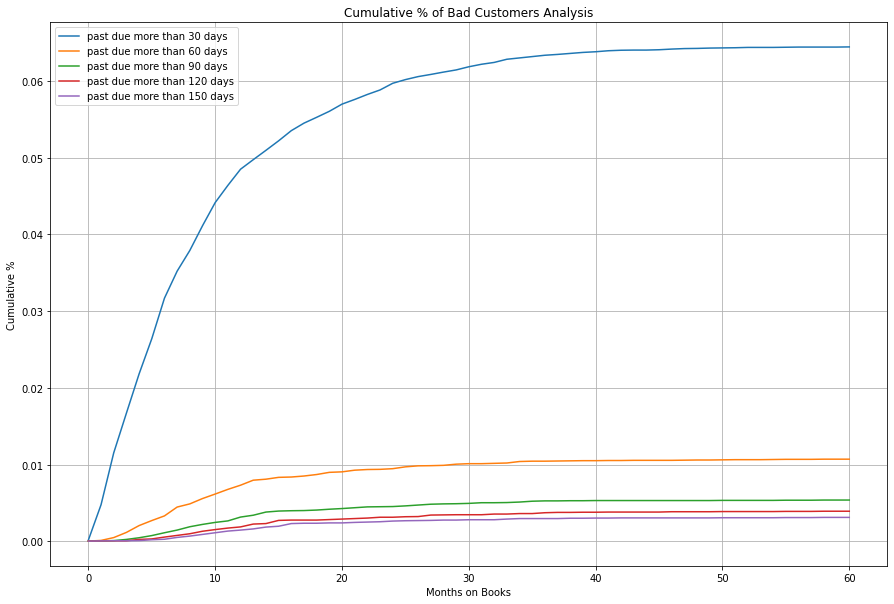

In [212]:
obslst = pd.DataFrame({'past due more than 30 days': morethan30,
                       'past due more than 60 days': morethan60,
                       'past due more than 90 days': morethan90,
                       'past due more than 120 days': morethan120,
                       'past due more than 150 days': morethan150
                        })

obslst.plot(grid = True, title = 'Cumulative % of Bad Customers Analysis',figsize=(15,10))
plt.xlabel('Months on Books')
plt.ylabel('Cumulative %')
plt.show()

# PreProcessing

In [213]:
credit=pd.read_csv('credit_record.csv')
application=pd.read_csv('application_record.csv')

## Data Cleaning

## Mising value 

In [214]:
print(credit.info())
print(application.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557

In [215]:
print(credit.describe())
print(application.describe())

                 ID  MONTHS_BALANCE
count  1.048575e+06    1.048575e+06
mean   5.068286e+06   -1.913700e+01
std    4.615058e+04    1.402350e+01
min    5.001711e+06   -6.000000e+01
25%    5.023644e+06   -2.900000e+01
50%    5.062104e+06   -1.700000e+01
75%    5.113856e+06   -7.000000e+00
max    5.150487e+06    0.000000e+00
                 ID   CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH  \
count  4.385570e+05  438557.000000      4.385570e+05  438557.000000   
mean   6.022176e+06       0.427390      1.875243e+05  -15997.904649   
std    5.716370e+05       0.724882      1.100869e+05    4185.030007   
min    5.008804e+06       0.000000      2.610000e+04  -25201.000000   
25%    5.609375e+06       0.000000      1.215000e+05  -19483.000000   
50%    6.047745e+06       0.000000      1.607805e+05  -15630.000000   
75%    6.456971e+06       1.000000      2.250000e+05  -12514.000000   
max    7.999952e+06      19.000000      6.750000e+06   -7489.000000   

       DAYS_EMPLOYED  FLAG_MOBIL  FL

There are huge nan/mising values in `OCCUPATION_TYPE`, while others seems not indicate any irregular data like under age or zero month balance, looks normal and have make sense min & max value.

In [216]:
len(application[application.OCCUPATION_TYPE.isnull()])/len(application)*100

30.601039317580152

Drop `OCCUPATION_TYPE`` from  data frame because there is 30% mising value

In [217]:
try :
    application.drop(columns='OCCUPATION_TYPE',inplace=True)
except:
    pass

### Duplicated

In [218]:
application[application.duplicated('ID',keep=False)]

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
421211  7702516           F            N               Y             2   
421268  7602432           M            N               Y             0   
421349  7602432           F            N               N             0   
421464  7836971           M            Y               N             1   
421698  7213374           M            Y               N             0   
...         ...         ...          ...             ...           ...   
433158  7282535           F            N               Y             0   
433159  7742853           M            N               Y             0   
433217  7135270           F            N               Y             0   
433666  7091721           F            Y               Y             0   
433789  7618285           F            N               Y             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
421211          180000.0               Working  Secondary / secondary special   
421268          315000.0  Commercial associate               Higher education   
421349          117000.0             Pensioner               Higher education   
421464          157500.0               Working  Secondary / secondary special   
421698          148500.0               Working  Secondary / secondary special   
...                  ...                   ...                            ...   
433158           63000.0             Pensioner  Secondary / secondary special   
433159          157500.0               Working  Secondary / secondary special   
433217          216000.0             Pensioner  Secondary / secondary special   
433666           90000.0  Commercial associate  Secondary / secondary special   
433789          157500.0               Working  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
421211               Married  House / apartment      -11753          -1256   
421268        Civil marriage  House / apartment      -16627          -1304   
421349               Married  House / apartment      -24708         365243   
421464               Married  House / apartment      -13771          -5520   
421698               Married  House / apartment       -9950           -961   
...                      ...                ...         ...            ...   
433158               Married  House / apartment      -21124         365243   
433159  Single / not married  House / apartment      -15052          -1695   
433217               Married  House / apartment      -23113         365243   
433666               Married  House / apartment      -14116          -2269   
433789  Single / not married  House / apartment      -10113          -1007   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  
421211           1                1           1           0              4.0  
421268           1                0           1           0              2.0  
421349           1                0           0           0              2.0  
421464           1                0           0           0              3.0  
421698           1                0           1           0              2.0  
...            ...              ...         ...         ...              ...  
433158           1                0           1           0              2.0  
433159           1                0           0           0              1.0  
433217           1                0           0           0              2.0  
433666           1                0           0           0              2.0  
433789           1                0           0           0              1.0  

[94 rows x 17 columns]

In [219]:
credit[credit.duplicated('ID')]

ID  MONTHS_BALANCE STATUS
1        5001711              -1      0
2        5001711              -2      0
3        5001711              -3      0
5        5001712              -1      C
6        5001712              -2      C
...          ...             ...    ...
1048570  5150487             -25      C
1048571  5150487             -26      C
1048572  5150487             -27      C
1048573  5150487             -28      C
1048574  5150487             -29      C

[1002590 rows x 3 columns]

There is some duplicated `ID` on `application` data frame, while on duplicate `ID` on `credit` data frame is normal thing to have. 

In [220]:
try:
    application.drop_duplicates(subset=['ID'],keep ='first',inplace=True)
except:
    pass

In [221]:
application

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008805           M            Y               Y             0   
2       5008806           M            Y               Y             0   
3       5008808           F            N               Y             0   
4       5008809           F            N               Y             0   
...         ...         ...          ...             ...           ...   
438552  6840104           M            N               Y             0   
438553  6840222           F            N               N             0   
438554  6841878           F            N               N             0   
438555  6842765           F            N               Y             0   
438556  6842885           F            N               Y             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               427500.0               Working               Higher education   
1               427500.0               Working               Higher education   
2               112500.0               Working  Secondary / secondary special   
3               270000.0  Commercial associate  Secondary / secondary special   
4               270000.0  Commercial associate  Secondary / secondary special   
...                  ...                   ...                            ...   
438552          135000.0             Pensioner  Secondary / secondary special   
438553          103500.0               Working  Secondary / secondary special   
438554           54000.0  Commercial associate               Higher education   
438555           72000.0             Pensioner  Secondary / secondary special   
438556          121500.0               Working  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             Civil marriage   Rented apartment      -12005          -4542   
1             Civil marriage   Rented apartment      -12005          -4542   
2                    Married  House / apartment      -21474          -1134   
3       Single / not married  House / apartment      -19110          -3051   
4       Single / not married  House / apartment      -19110          -3051   
...                      ...                ...         ...            ...   
438552             Separated  House / apartment      -22717         365243   
438553  Single / not married  House / apartment      -15939          -3007   
438554  Single / not married       With parents       -8169           -372   
438555               Married  House / apartment      -21673         365243   
438556               Married  House / apartment      -18858          -1201   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  
0                1                1           0           0              2.0  
1                1                1           0           0              2.0  
2                1                0           0           0              2.0  
3                1                0           1           1              1.0  
4                1                0           1           1              1.0  
...            ...              ...         ...         ...              ...  
438552           1                0           0           0              1.0  
438553           1                0           0           0              1.0  
438554           1                1           0           0              1.0  
438555           1                0           0           0              2.0  
438556           1                0           1           0              2.0  

[438510 rows x 17 columns]

## Target & Transform

In [222]:
credit

ID  MONTHS_BALANCE STATUS
0        5001711               0      X
1        5001711              -1      0
2        5001711              -2      0
3        5001711              -3      0
4        5001712               0      C
...          ...             ...    ...
1048570  5150487             -25      C
1048571  5150487             -26      C
1048572  5150487             -27      C
1048573  5150487             -28      C
1048574  5150487             -29      C

[1048575 rows x 3 columns]

In [223]:
status_dict = {'C' : 'Good_Debt',
               'X' : 'Good_Debt',
               '0' : 'Good_Debt',
               '1' : 'Good_Debt',
               '2' : 'Bad_Debt',
               '3' : 'Bad_Debt',
               '4' : 'Bad_Debt',
               '5' : 'Bad_Debt'}

credit.replace({'STATUS' : status_dict}, inplace=True)

In [224]:
credit=credit[['ID','MONTHS_BALANCE','STATUS']]
credit = credit.value_counts(subset=['ID', 'STATUS']).unstack(fill_value=0)
credit

STATUS   Bad_Debt  Good_Debt
ID                          
5001711         0          4
5001712         0         19
5001713         0         22
5001714         0         15
5001715         0         60
...           ...        ...
5150482         0         18
5150483         0         18
5150484         0         13
5150485         0          2
5150487         0         30

[45985 rows x 2 columns]

With Vintage Analysis before, if i use 30 days payment due as standart 6% labeled as bad customers and occured to common, thus I choose users who overdue for more than 60 days as target risk users. Those samples are marked as '1', else are '0'.

In [225]:
# If a number of 'Good_Debt' months in the books is higher than the number of 'Bad_Debt' months, the customer gets the credit approval
credit.loc[(credit['Good_Debt'] > credit['Bad_Debt']), 'CREDIT_APPROVAL_STATUS'] = 0
credit.loc[(credit['Good_Debt'] <= credit['Bad_Debt']), 'CREDIT_APPROVAL_STATUS'] = 1

In [226]:
#extra feature
credit['MONTHS_IN_BOOKS'] = credit['Good_Debt'] + credit['Bad_Debt']
credit.drop(['Bad_Debt', 'Good_Debt'], axis=1, inplace=True)

In [227]:
application['DAYS_BIRTH']=abs(application['DAYS_BIRTH']//360)

## Merging file

In [228]:
df = pd.merge(left= application,right= credit, how='inner',on='ID')

In [229]:
application

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0       5008804           M            Y               Y             0   
1       5008805           M            Y               Y             0   
2       5008806           M            Y               Y             0   
3       5008808           F            N               Y             0   
4       5008809           F            N               Y             0   
...         ...         ...          ...             ...           ...   
438552  6840104           M            N               Y             0   
438553  6840222           F            N               N             0   
438554  6841878           F            N               N             0   
438555  6842765           F            N               Y             0   
438556  6842885           F            N               Y             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0               427500.0               Working               Higher education   
1               427500.0               Working               Higher education   
2               112500.0               Working  Secondary / secondary special   
3               270000.0  Commercial associate  Secondary / secondary special   
4               270000.0  Commercial associate  Secondary / secondary special   
...                  ...                   ...                            ...   
438552          135000.0             Pensioner  Secondary / secondary special   
438553          103500.0               Working  Secondary / secondary special   
438554           54000.0  Commercial associate               Higher education   
438555           72000.0             Pensioner  Secondary / secondary special   
438556          121500.0               Working  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             Civil marriage   Rented apartment          34          -4542   
1             Civil marriage   Rented apartment          34          -4542   
2                    Married  House / apartment          60          -1134   
3       Single / not married  House / apartment          54          -3051   
4       Single / not married  House / apartment          54          -3051   
...                      ...                ...         ...            ...   
438552             Separated  House / apartment          64         365243   
438553  Single / not married  House / apartment          45          -3007   
438554  Single / not married       With parents          23           -372   
438555               Married  House / apartment          61         365243   
438556               Married  House / apartment          53          -1201   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  
0                1                1           0           0              2.0  
1                1                1           0           0              2.0  
2                1                0           0           0              2.0  
3                1                0           1           1              1.0  
4                1                0           1           1              1.0  
...            ...              ...         ...         ...              ...  
438552           1                0           0           0              1.0  
438553           1                0           0           0              1.0  
438554           1                1           0           0              1.0  
438555           1                0           0           0              2.0  
438556           1                0           1           0              2.0  

[438510 rows x 17 columns]

## Rename

In [230]:
name={'CODE_GENDER':'Gender',
	'FLAG_OWN_CAR':'Car',	
    'FLAG_OWN_REALTY':'Property',	
    'CNT_CHILDREN': 'Children',
    'AMT_INCOME_TOTAL':'Income',	
    'NAME_INCOME_TYPE': 'Job',	
    'NAME_EDUCATION_TYPE': 'Education',
    'NAME_FAMILY_STATUS':'Family_Status',
    'NAME_HOUSING_TYPE':'House_Type',
    'DAYS_BIRTH':'Age',
    'DAYS_EMPLOYED':'Employed',
    'FLAG_MOBIL':'Mobile_Phone',
    'FLAG_WORK_PHONE': 'Work_Phone'	,
    'FLAG_PHONE':'Phone',
    'FLAG_EMAIL':"Email",
    'CNT_FAM_MEMBERS':'Family_Member',
    'CREDIT_APPROVAL_STATUS':'Status',
    'MONTHS_IN_BOOKS':'Months_in_books'}

In [231]:
df.rename(columns=name,inplace=True)

In [232]:
df

ID Gender Car Property  Children    Income                   Job  \
0      5008804      M   Y        Y         0  427500.0               Working   
1      5008805      M   Y        Y         0  427500.0               Working   
2      5008806      M   Y        Y         0  112500.0               Working   
3      5008808      F   N        Y         0  270000.0  Commercial associate   
4      5008809      F   N        Y         0  270000.0  Commercial associate   
...        ...    ...  ..      ...       ...       ...                   ...   
36452  5149828      M   Y        Y         0  315000.0               Working   
36453  5149834      F   N        Y         0  157500.0  Commercial associate   
36454  5149838      F   N        Y         0  157500.0             Pensioner   
36455  5150049      F   N        Y         0  283500.0               Working   
36456  5150337      M   N        Y         0  112500.0               Working   

                           Education         Family_Status         House_Type  \
0                   Higher education        Civil marriage   Rented apartment   
1                   Higher education        Civil marriage   Rented apartment   
2      Secondary / secondary special               Married  House / apartment   
3      Secondary / secondary special  Single / not married  House / apartment   
4      Secondary / secondary special  Single / not married  House / apartment   
...                              ...                   ...                ...   
36452  Secondary / secondary special               Married  House / apartment   
36453               Higher education               Married  House / apartment   
36454               Higher education               Married  House / apartment   
36455  Secondary / secondary special               Married  House / apartment   
36456  Secondary / secondary special  Single / not married   Rented apartment   

       Age  Employed  Mobile_Phone  Work_Phone  Phone  Email  Family_Member  \
0       34     -4542             1           1      0      0            2.0   
1       34     -4542             1           1      0      0            2.0   
2       60     -1134             1           0      0      0            2.0   
3       54     -3051             1           0      1      1            1.0   
4       54     -3051             1           0      1      1            1.0   
...    ...       ...           ...         ...    ...    ...            ...   
36452   49     -2420             1           0      0      0            2.0   
36453   35     -1325             1           0      1      1            2.0   
36454   35     -1325             1           0      1      1            2.0   
36455   50      -655             1           0      0      0            2.0   
36456   26     -1193             1           0      0      0            1.0   

       Status  Months_in_books  
0         0.0               16  
1         0.0               15  
2         0.0               30  
3         0.0                5  
4         0.0                5  
...       ...              ...  
36452     0.0               12  
36453     0.0               24  
36454     0.0               33  
36455     0.0               10  
36456     0.0               14  

[36457 rows x 19 columns]

In [233]:
test

ID Gender Car Property  Children    Income                   Job  \
2061   5021430      F   N        Y         0  126000.0  Commercial associate   
2062   5021431      F   N        Y         0  126000.0  Commercial associate   
4270   5024213      F   Y        Y         0  540000.0  Commercial associate   
8913   5038807      M   Y        Y         0  202500.0  Commercial associate   
9724   5042064      F   Y        N         2  270000.0         State servant   
14796  5061360      M   N        Y         0   65250.0             Pensioner   
19315  5085886      M   Y        Y         0  315000.0  Commercial associate   
24934  5117313      F   N        Y         1  157500.0  Commercial associate   
27300  5113933      F   N        N         0   67500.0             Pensioner   
28510  5116301      F   N        Y         0  180000.0             Pensioner   
28513  5116304      F   N        Y         0  180000.0             Pensioner   
28514  5116305      F   N        Y         0  180000.0             Pensioner   
31722  5135344      M   N        Y         0  112500.0  Commercial associate   
31723  5135345      M   N        Y         0  112500.0  Commercial associate   
31724  5135346      M   N        Y         0  112500.0  Commercial associate   
33264  5142361      M   Y        Y         1  112500.0               Working   
33265  5142362      M   Y        Y         1  112500.0               Working   
33340  5142458      F   N        Y         0   67500.0  Commercial associate   
33341  5142459      F   N        Y         0   67500.0  Commercial associate   
35269  5149188      M   Y        N         1  450000.0               Working   
35272  5149192      M   Y        N         1  450000.0               Working   
36108  5009744      F   Y        N         0  315000.0  Commercial associate   
36109  5009749      F   Y        N         0  315000.0  Commercial associate   
36110  5009752      F   Y        N         0  315000.0  Commercial associate   
36111  5009753      F   Y        N         0  315000.0             Pensioner   
36112  5009754      F   Y        N         0  315000.0  Commercial associate   
36113  5009894      F   N        N         0  180000.0             Pensioner   
36123  5021303      M   N        N         1  472500.0             Pensioner   
36156  5025127      M   N        Y         0  292500.0               Working   
36158  5028580      M   N        N         0  540000.0  Commercial associate   
36161  5029028      F   N        Y         0   90000.0               Working   
36162  5029311      F   N        Y         0  112500.0             Pensioner   
36168  5033453      F   N        N         0  135000.0               Working   
36177  5036590      M   Y        Y         0  292500.0               Working   
36194  5046324      F   N        Y         1  157500.0  Commercial associate   
36195  5046328      F   N        Y         1  157500.0             Pensioner   
36217  5051160      M   Y        N         1  135000.0               Working   
36220  5052659      F   N        Y         0  103500.0               Working   
36244  5058352      F   N        Y         0   99000.0             Pensioner   
36273  5079168      M   Y        N         0  202500.0               Working   
36282  5089959      M   N        Y         1  126000.0  Commercial associate   
36297  5092245      F   N        N         0  103500.0             Pensioner   
36302  5093286      M   N        Y         0  157500.0               Working   
36349  5113621      M   N        N         0  225000.0               Working   
36374  5116906      M   Y        Y         0  211500.0             Pensioner   
36396  5125716      F   Y        Y         0  135000.0               Working   
36397  5125761      M   N        Y         0  270000.0  Commercial associate   
36414  5135991      F   N        Y         1  585000.0  Commercial associate   
36420  5142456      F   N        N         0   67500.0  Commercial associate   
36449  51491

<AxesSubplot:xlabel='Gender', ylabel='Count'>

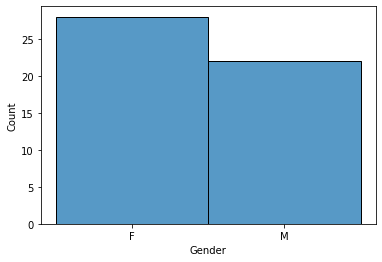

In [234]:
test=df[df.Status==1]
sns.histplot(test['Gender'])

## Encoding

In [235]:
for i,x in enumerate (df.columns):
    if df[x].dtypes=='object':
        print(x,'\n',df[x].unique())

Gender 
 ['M' 'F']
Car 
 ['Y' 'N']
Property 
 ['Y' 'N']
Job 
 ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
Education 
 ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Family_Status 
 ['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
House_Type 
 ['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']


for binary i will using label encoding
for non-binary i will using one hot encoding

In [236]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
col=['Gender','Car','Property']
for i in col:
    df[i]=le.fit_transform(df[i])
    

In [237]:
df =pd.get_dummies(data=df,columns=['Education','Family_Status','House_Type','Job'],drop_first=True)
df.head().style

## Drop ID

In [238]:
df.drop(columns=['ID','Gender'],inplace=True)

## Feature + Target

In [239]:
y=df['Status']
x=df.drop(columns='Status')

## Scalling

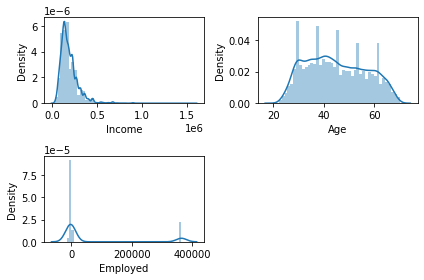

In [240]:
plt.subplot(2,2,1)
sns.distplot(df['Income'])
plt.subplot(2,2,2)
sns.distplot(df['Age'])
plt.subplot(2,2,3)
sns.distplot(df['Employed'])
plt.tight_layout()


all of theme seems dont have normal distribution we will use standard scaller

In [241]:
from sklearn.preprocessing import StandardScaler
scaller=StandardScaler()

scaller.fit(x)
x_std=scaller.transform(x)

## Split Data

In [242]:
from sklearn.model_selection import train_test_split 
X_train, X_test,y_train,y_test = train_test_split(x_std,
                                                y,
                                                test_size = 0.3,
                                                random_state = 42)

In [243]:
from imblearn import over_sampling
sm = over_sampling.SMOTE(random_state=42)

X_train_balanced,y_train_balanced= sm.fit_resample(X_train,y_train)

# Modeling

All tuning `scoring` model parameter will be set to `recall`, the reason is because we need to predict someone are pottetial bad user so we can prevent lose for company.
<br>
With that point in mind, we need `False Negative` as small as possible

## All basic model

In [244]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(n_estimators=250,max_depth=12,min_samples_leaf=16),
    "XGBoost" : XGBClassifier(max_depth=12,
                              n_estimators=250,
                              min_child_weight=8, 
                              subsample=0.8, 
                              learning_rate =0.02,    
                              seed=42),
    "CatBoost" : CatBoostClassifier(iterations=250,
                           learning_rate=0.2,
                           od_type='Iter',
                           verbose=25,
                           depth=16,
                           random_seed=42)
}

result_table = pd.DataFrame(columns=['classifiers','accuracy','presicion','recall','f1_score','fpr','tpr','auc'])

y_test = y_test.astype(int)


for key, classifier in classifiers.items():
    classifier.fit(X_train_balanced,y_train_balanced )
    y_predict = classifier.predict(X_test)
    
    yproba = classifier.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    conf_matrix = confusion_matrix(y_test,y_predict)
    
    result_table = result_table.append({'classifiers':key,
                                        'accuracy':accuracy_score(y_test, y_predict),
                                        'presicion':precision_score(y_test, y_predict, average='weighted'),
                                        'recall':recall_score(y_test, y_predict, average='weighted'),
                                        'f1_score':f1_score(y_test, y_predict, average='weighted'),
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc
                                         }, ignore_index=True)
        
result_table.set_index('classifiers', inplace=True)

0:	learn: 0.3635878	total: 4.32s	remaining: 17m 56s
25:	learn: 0.0059669	total: 1m 39s	remaining: 14m 18s
50:	learn: 0.0024362	total: 3m 15s	remaining: 12m 44s
75:	learn: 0.0017918	total: 4m 43s	remaining: 10m 49s
100:	learn: 0.0017440	total: 6m 3s	remaining: 8m 56s
125:	learn: 0.0017438	total: 7m 21s	remaining: 7m 14s
150:	learn: 0.0017434	total: 8m 39s	remaining: 5m 40s
175:	learn: 0.0017090	total: 9m 58s	remaining: 4m 11s
200:	learn: 0.0017090	total: 11m 14s	remaining: 2m 44s
225:	learn: 0.0017089	total: 12m 31s	remaining: 1m 19s
249:	learn: 0.0017088	total: 13m 46s	remaining: 0us


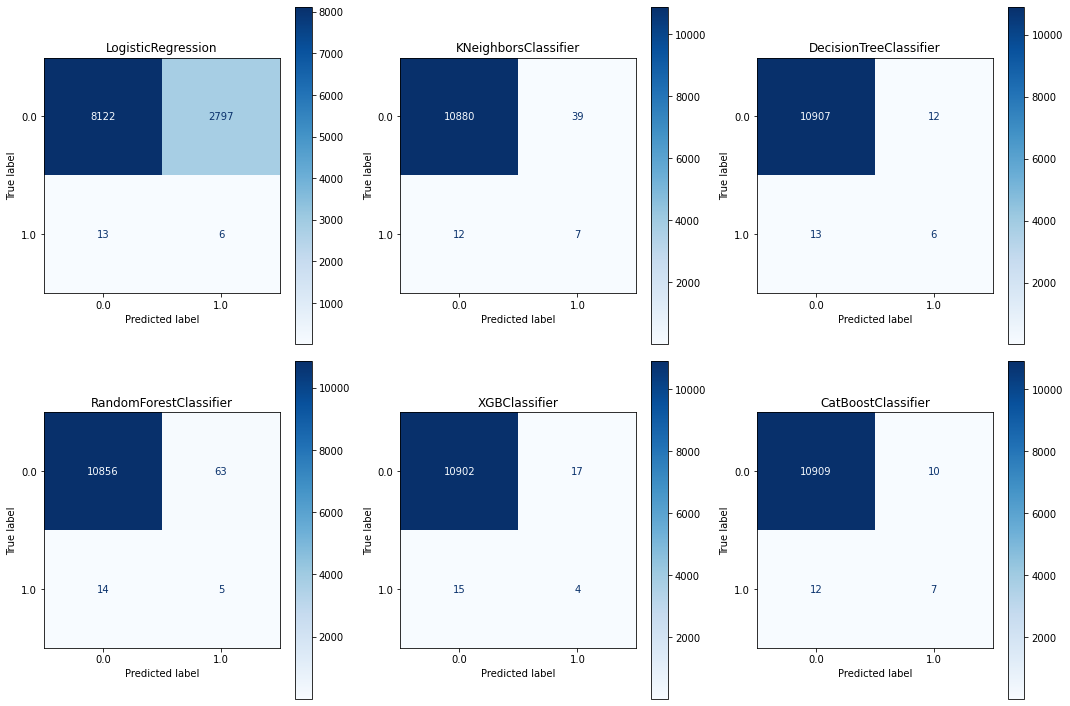

In [245]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for cls, ax in zip(list(classifiers.values()), axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test,
                          y_test, 
                          ax=ax, 
                          cmap='Blues')
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

In [246]:
classifier.eval_metrics

<bound method CatBoost.eval_metrics of <catboost.core.CatBoostClassifier object at 0x000001433F147760>>

<AxesSubplot:xlabel='importance', ylabel='index'>

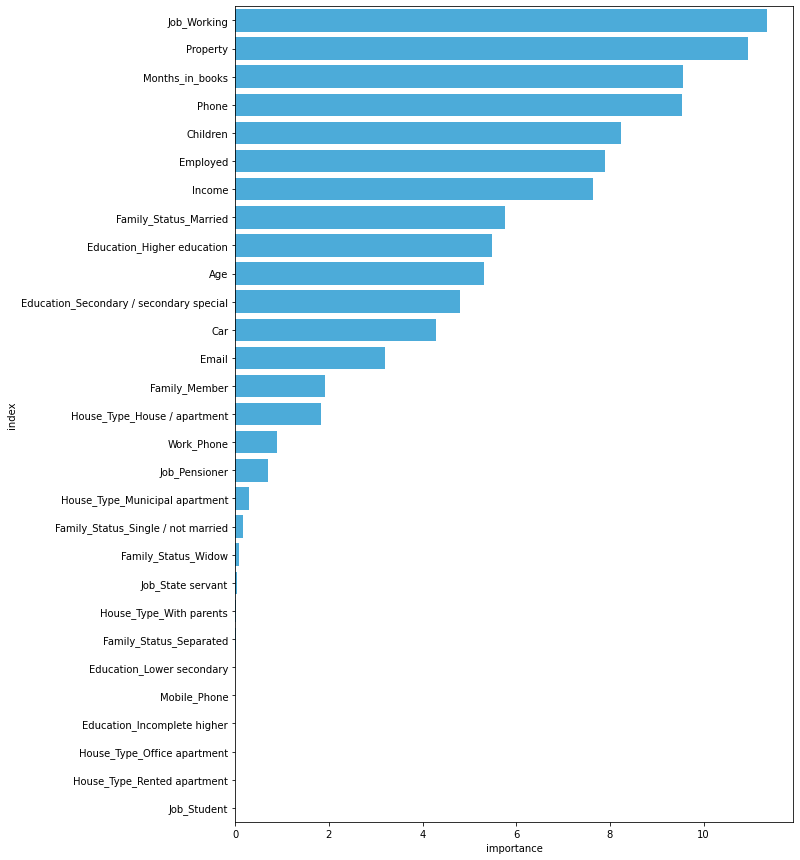

In [247]:
feature_importances = pd.DataFrame(classifier.feature_importances_,
                                   index = x.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

fig, ax = plt.subplots(1,1, figsize=(10,15))
sns.barplot(x='importance', y='index', color='#34B3F1',data=feature_importances.reset_index())

## Decision Tree

In [268]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
df_clf=DecisionTreeClassifier(random_state=42)
parameters = {
    'max_depth': (2,4,5,6,8,10,12,20,40,60,None),
    'criterion': ('gini','entropy'),
    'min_samples_split': (2,3,8,16,32,40)
}

# note: we use recall
dt_clf_gridcv = GridSearchCV(df_clf, parameters, cv=5, scoring='accuracy')
dt_clf_gridcv.fit(X_train_balanced, y_train_balanced)

CPU times: total: 2min 17s
Wall time: 2min 17s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': (2, 4, 5, 6, 8, 10, 12, 20, 40, 60, None),
                         'min_samples_split': (2, 3, 8, 16, 32, 40)},
             scoring='recall')

In [269]:
# the results
cv_result = pd.DataFrame(dt_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

params  mean_test_score  \
71  {'criterion': 'entropy', 'max_depth': 2, 'min_...         0.999882   
70  {'criterion': 'entropy', 'max_depth': 2, 'min_...         0.999882   
69  {'criterion': 'entropy', 'max_depth': 2, 'min_...         0.999882   
68  {'criterion': 'entropy', 'max_depth': 2, 'min_...         0.999882   
67  {'criterion': 'entropy', 'max_depth': 2, 'min_...         0.999882   
..                                                ...              ...   
4   {'criterion': 'gini', 'max_depth': 2, 'min_sam...         0.808266   
3   {'criterion': 'gini', 'max_depth': 2, 'min_sam...         0.808266   
2   {'criterion': 'gini', 'max_depth': 2, 'min_sam...         0.808266   
1   {'criterion': 'gini', 'max_depth': 2, 'min_sam...         0.808266   
0   {'criterion': 'gini', 'max_depth': 2, 'min_sam...         0.808266   

    rank_test_score  
71                1  
70                1  
69                1  
68                1  
67                1  
..              ...  
4               127  
3               127  
2               127  
1               127  
0               127  

[132 rows x 3 columns]

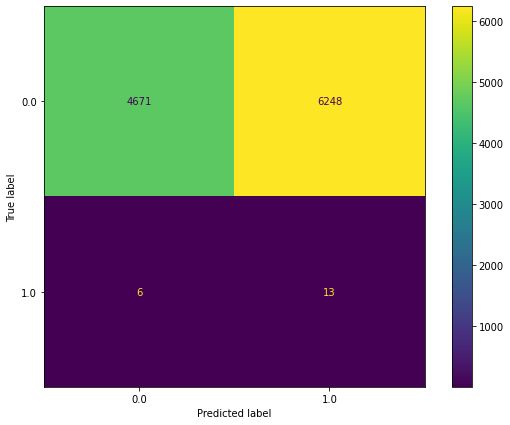

In [270]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = dt_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=dt_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=dt_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [251]:
# classification report
from sklearn.metrics import classification_report
y_pred = dt_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10919
           1       0.29      0.32      0.30        19

    accuracy                           1.00     10938
   macro avg       0.64      0.66      0.65     10938
weighted avg       1.00      1.00      1.00     10938



With hyper parameter Decision Tree classifier can only detect 31 % bad user with recall of 99,74%

## Random Forest

In [252]:
%%time
rf_clf=RandomForestClassifier(random_state=42)
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (20,30,40,50,60,80),
    'max_depth':(65,75,80,85)
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='accuracy')
rf_clf_gridcv.fit(X_train_balanced, y_train_balanced)

CPU times: total: 3min 22s
Wall time: 3min 22s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (65, 75, 80, 85),
                         'n_estimators': (20, 30, 40, 50, 60, 80)},
             scoring='accuracy')

In [253]:
# the results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

params  mean_test_score  rank_test_score
1   {'max_depth': 65, 'n_estimators': 30}         0.999176                1
19  {'max_depth': 85, 'n_estimators': 30}         0.999176                1
7   {'max_depth': 75, 'n_estimators': 30}         0.999176                1
13  {'max_depth': 80, 'n_estimators': 30}         0.999176                1
0   {'max_depth': 65, 'n_estimators': 20}         0.999157                5
21  {'max_depth': 85, 'n_estimators': 50}         0.999157                5
18  {'max_depth': 85, 'n_estimators': 20}         0.999157                5
17  {'max_depth': 80, 'n_estimators': 80}         0.999157                5
15  {'max_depth': 80, 'n_estimators': 50}         0.999157                5
12  {'max_depth': 80, 'n_estimators': 20}         0.999157                5
11  {'max_depth': 75, 'n_estimators': 80}         0.999157                5
9   {'max_depth': 75, 'n_estimators': 50}         0.999157                5
6   {'max_depth': 75, 'n_estimators': 20}         0.999157                5
5   {'max_depth': 65, 'n_estimators': 80}         0.999157                5
3   {'max_depth': 65, 'n_estimators': 50}         0.999157                5
23  {'max_depth': 85, 'n_estimators': 80}         0.999157                5
8   {'max_depth': 75, 'n_estimators': 40}         0.999137               17
14  {'max_depth': 80, 'n_estimators': 40}         0.999137               17
20  {'max_depth': 85, 'n_estimators': 40}         0.999137               17
2   {'max_depth': 65, 'n_estimators': 40}         0.999137               17
22  {'max_depth': 85, 'n_estimators': 60}         0.999137               21
16  {'max_depth': 80, 'n_estimators': 60}         0.999137               21
4   {'max_depth': 65, 'n_estimators': 60}         0.999137               21
10  {'max_depth': 75, 'n_estimators': 60}         0.999137               21

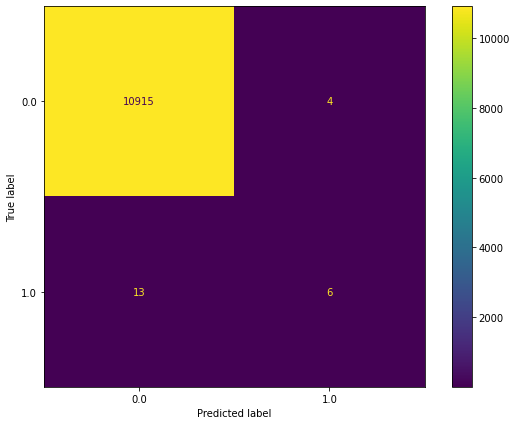

In [254]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [255]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10919
           1       0.60      0.32      0.41        19

    accuracy                           1.00     10938
   macro avg       0.80      0.66      0.71     10938
weighted avg       1.00      1.00      1.00     10938



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.780


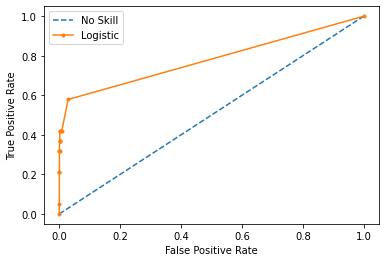

In [256]:
from matplotlib import pyplot
rf_probs = rf_clf_gridcv.best_estimator_.predict_proba(X_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, rf_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, rf_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

With hyper parameter Random forest classifier can only detect 31 % bad user with recall of 99,75%

with using scaller there is some improve to our score

## svc

In [257]:
from sklearn.svm import LinearSVC, SVC
estimator = LinearSVC(class_weight='balanced')
estimator.fit(X_train, y_train.values.ravel())
score = estimator.score(X_test, y_test)
print(score)

0.9980800877674163


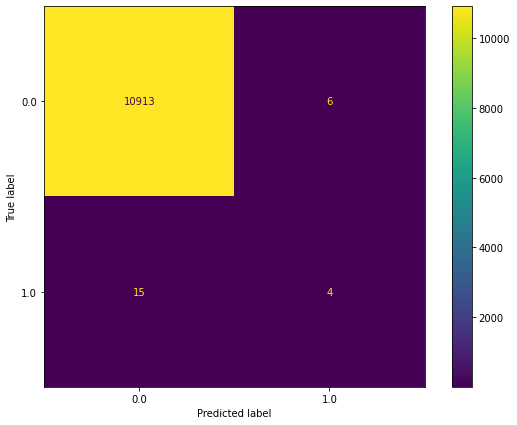

In [258]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = estimator.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=estimator.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=estimator.classes_)

disp.plot(ax=ax)
plt.show()

## Cat Boost

In [261]:
%%time
cat=CatBoostClassifier(random_state=42)
parameters = {
    'depth'         :(4,5,6,7,8,9, 10),
    'learning_rate' : (0.01,0.02,0.03,0.04),
    'iterations'    : (10, 20,30,40,50,60,70,80,90, 100)
}

# note: we use recall
cat_gridcv = GridSearchCV(cat, parameters, cv=5, scoring='recall')
cat_gridcv.fit(X_train_balanced, y_train_balanced)

0:	learn: 0.6819208	total: 10.9ms	remaining: 98.5ms
1:	learn: 0.6671828	total: 19.1ms	remaining: 76.6ms
2:	learn: 0.6585356	total: 27.2ms	remaining: 63.4ms
3:	learn: 0.6485748	total: 34.6ms	remaining: 51.9ms
4:	learn: 0.6399243	total: 42.7ms	remaining: 42.7ms
5:	learn: 0.6317602	total: 49.9ms	remaining: 33.2ms
6:	learn: 0.6235570	total: 57.9ms	remaining: 24.8ms
7:	learn: 0.6160045	total: 65.2ms	remaining: 16.3ms
8:	learn: 0.6066534	total: 73.5ms	remaining: 8.16ms
9:	learn: 0.5994922	total: 81.2ms	remaining: 0us
0:	learn: 0.6782426	total: 11.3ms	remaining: 102ms
1:	learn: 0.6692470	total: 18.8ms	remaining: 75.4ms
2:	learn: 0.6573015	total: 27.7ms	remaining: 64.6ms
3:	learn: 0.6491161	total: 35.6ms	remaining: 53.4ms
4:	learn: 0.6394771	total: 44.4ms	remaining: 44.4ms
5:	learn: 0.6298587	total: 53.3ms	remaining: 35.5ms
6:	learn: 0.6218102	total: 61.9ms	remaining: 26.5ms
7:	learn: 0.6142719	total: 70.2ms	remaining: 17.6ms
8:	learn: 0.6057048	total: 78.7ms	remaining: 8.74ms
9:	learn: 0.5994

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000014301DF0520>,
             param_grid={'depth': (4, 5, 6, 7, 8, 9, 10),
                         'iterations': (10, 20, 30, 40, 50, 60, 70, 80, 90,
                                        100),
                         'learning_rate': (0.01, 0.02, 0.03, 0.04)},
             scoring='recall')

In [265]:
# the results
cv_result = pd.DataFrame(cat_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score').head().style

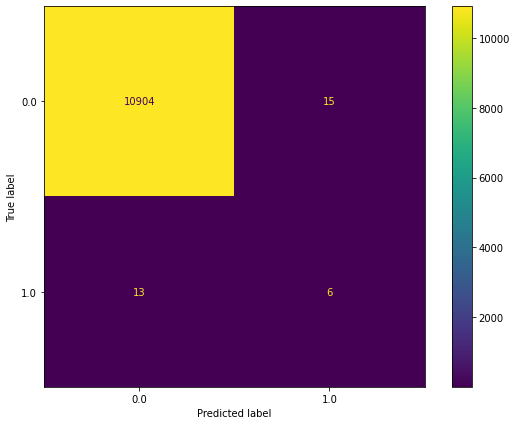

In [266]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = cat_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=cat_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=cat_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [267]:
# classification report
from sklearn.metrics import classification_report
y_pred = cat_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10919
           1       0.29      0.32      0.30        19

    accuracy                           1.00     10938
   macro avg       0.64      0.66      0.65     10938
weighted avg       1.00      1.00      1.00     10938



<AxesSubplot:xlabel='importance', ylabel='index'>

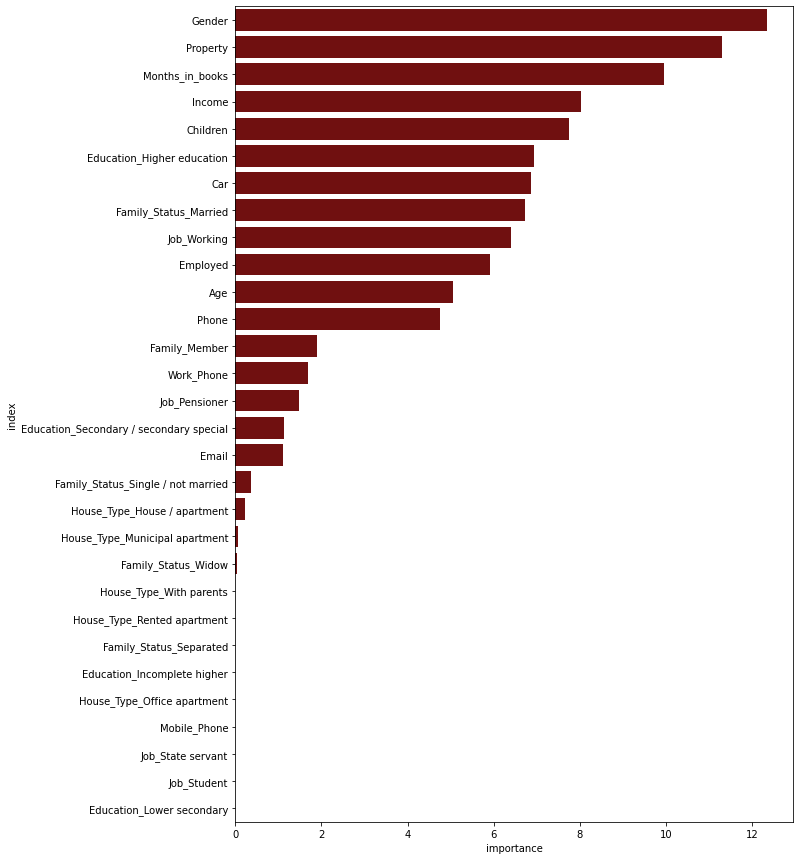

In [ ]:
feature_importances = pd.DataFrame(classifier.feature_importances_,
                                   index = x.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

fig, ax = plt.subplots(1,1, figsize=(10,15))
sns.barplot(x='importance', y='index', color='#800000',data=feature_importances.reset_index())